# **EDA: NYC Taxi Trip Duration**


---



## **1. Dataset Overview**
- Train + validation combined: check shape and columns
- Inspect first few rows to understand structure
- Check data types, missing values, and duplicates

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
%matplotlib inline

#disable warnings
import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


In [ ]:
#Read data
df_train = pd.read_csv('/content/drive/MyDrive/Projects/NYC trip duration/split/train.csv')
df_val = pd.read_csv('/content/drive/MyDrive/Projects/NYC trip duration/split/val.csv')
df = pd.concat([df_train, df_val])

# Reset the index
df.reset_index(drop=True, inplace=True)

In [ ]:
df.shape

(1229319, 10)

In [ ]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration'],
      dtype='object')

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2793718,2,2016-06-08 07:36:19,1,-73.985611,40.735943,-73.980331,40.760468,N,1040
1,id3485529,2,2016-04-03 12:58:11,1,-73.978394,40.764351,-73.991623,40.749859,N,827
2,id1816614,2,2016-06-05 02:49:13,5,-73.989059,40.744389,-73.973381,40.748692,N,614
3,id1050851,2,2016-05-05 17:18:27,2,-73.990326,40.731136,-73.991264,40.748917,N,867
4,id0140657,1,2016-05-12 17:43:38,4,-73.789497,40.646675,-73.987137,40.759232,N,4967


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229319 entries, 0 to 1229318
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1229319 non-null  object 
 1   vendor_id           1229319 non-null  int64  
 2   pickup_datetime     1229319 non-null  object 
 3   passenger_count     1229319 non-null  int64  
 4   pickup_longitude    1229319 non-null  float64
 5   pickup_latitude     1229319 non-null  float64
 6   dropoff_longitude   1229319 non-null  float64
 7   dropoff_latitude    1229319 non-null  float64
 8   store_and_fwd_flag  1229319 non-null  object 
 9   trip_duration       1229319 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 93.8+ MB


## **2. Summary Statistics & Initial Observations**
- Numeric features: describe min, max, mean, std, quartiles
- Categorical features: value counts
- Notes on potential outliers and anomalies

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
vendor_id,1229319.0,1.534912,0.498780,1.000000,1.000000,2.000000,2.000000,2.000000e+00
passenger_count,1229319.0,1.664531,1.314509,0.000000,1.000000,1.000000,2.000000,8.000000e+00
pickup_longitude,1229319.0,-73.973446,0.061780,-121.933342,-73.991852,-73.981728,-73.967346,-6.133553e+01
pickup_latitude,1229319.0,40.750928,0.033545,34.359695,40.737370,40.754108,40.768360,5.188108e+01
dropoff_longitude,1229319.0,-73.973395,0.061641,-121.933304,-73.991325,-73.979759,-73.963028,-6.133553e+01
dropoff_latitude,1229319.0,40.751816,0.036341,32.181141,40.735901,40.754532,40.769821,4.392103e+01
trip_duration,1229319.0,959.691748,5263.573404,1.000000,397.000000,662.000000,1075.000000,3.526282e+06


### Observations from Summary Statistics
- `trip_duration` shows extreme values → likely outliers
- `passenger_count` has 0 and unusually high values → possible data errors
- Coordinates alone don’t give much insight; visualizations needed


In [ ]:
#feature details function
def feature_details(feature):
    if df[feature].dtype in ['int64','float64']:
        print(df[feature].describe(), end='\n\n')
    else:
        print(df[feature].value_counts(), end='\n\n')

# Convert categorical columns for efficiency
for col in ['vendor_id','store_and_fwd_flag']:
    df[col] = df[col].astype('category')

### Let's quickly skim over the features

In [ ]:
feature_details("vendor_id")

vendor_id
2    657578
1    571741
Name: count, dtype: int64



### Vendor ID
- Categorical feature indicating provider
- Two categories: likely ‘CMT’ and ‘VTS’



In [ ]:
feature_details("passenger_count")

count    1.229319e+06
mean     1.664531e+00
std      1.314509e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      8.000000e+00
Name: passenger_count, dtype: float64



### Passenger Count
- Most trips have 1–6 passengers
- Values of 0 or greater than 6 are rare → potential outliers
- Consider treating as categorical for modeling





In [ ]:
feature_details("pickup_datetime")

pickup_datetime
2016-05-07 13:18:07    5
2016-01-12 18:48:44    5
2016-04-05 18:55:21    5
2016-03-14 17:19:59    4
2016-04-08 12:27:08    4
                      ..
2016-04-29 11:40:32    1
2016-06-03 19:52:57    1
2016-06-09 23:30:00    1
2016-02-04 10:12:19    1
2016-02-04 10:36:09    1
Name: count, Length: 1173138, dtype: int64



### Pickup Datetime
- No immediate insights from raw timestamps
- Feature extraction (hour, weekday, month) planned for later


In [ ]:
coordinates = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude','dropoff_latitude']
for i in coordinates:
  print(f"details for {i}")
  feature_details(i)
  print("\n")

details for pickup_longitude
count    1.229319e+06
mean    -7.397345e+01
std      6.178003e-02
min     -1.219333e+02
25%     -7.399185e+01
50%     -7.398173e+01
75%     -7.396735e+01
max     -6.133553e+01
Name: pickup_longitude, dtype: float64



details for pickup_latitude
count    1.229319e+06
mean     4.075093e+01
std      3.354454e-02
min      3.435970e+01
25%      4.073737e+01
50%      4.075411e+01
75%      4.076836e+01
max      5.188108e+01
Name: pickup_latitude, dtype: float64



details for dropoff_longitude
count    1.229319e+06
mean    -7.397340e+01
std      6.164072e-02
min     -1.219333e+02
25%     -7.399133e+01
50%     -7.397976e+01
75%     -7.396303e+01
max     -6.133553e+01
Name: dropoff_longitude, dtype: float64



details for dropoff_latitude
count    1.229319e+06
mean     4.075182e+01
std      3.634104e-02
min      3.218114e+01
25%      4.073590e+01
50%      4.075453e+01
75%      4.076982e+01
max      4.392103e+01
Name: dropoff_latitude, dtype: float64





### Coordinates (Pickup & Dropoff)
- Raw latitude/longitude values need visualization
- Applying feature engineering would be very useful
- Next: scatter plots and distance-based feature engineering

In [ ]:
feature_details("store_and_fwd_flag")

store_and_fwd_flag
N    1222501
Y       6818
Name: count, dtype: int64



### Store and Forward Flag
- Categorical feature indicating if trip info was stored and sent later



# **3. Target Analysis: `trip_duration`**
- Analyze the distribution of the target variable
- Identify skewness and potential outliers
- Consider log transformation to reduce skewness for modeling
- Check summary statistics and visualize with boxplot

In [ ]:
feature_details("trip_duration")
trip_duration_minutes = df["trip_duration"] / 60


count    1.229319e+06
mean     9.596917e+02
std      5.263573e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.075000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64



As we noticed before one second and 3e6 seconds for a trip duaration is very unusual

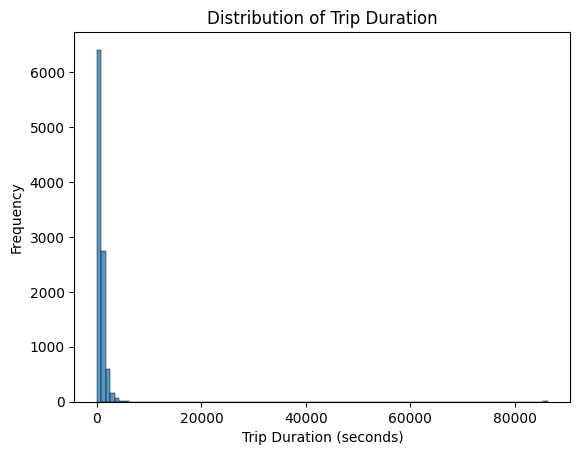

<Figure size 1000x500 with 0 Axes>

In [ ]:
fig = sns.histplot(df["trip_duration"].sample(10000) , bins=100 , kde=False)
plt.xlabel("Trip Duration (seconds)")
plt.ylabel("Frequency")
plt.title("Distribution of Trip Duration")
plt.figure(figsize=(10,5))
plt.show()

### Distribution of `trip_duration`
The raw target variable is heavily skewed:
- Most trips are short
- A few trips last for hours (or even days) → extreme outliers
- Skewness can negatively affect model training since many algorithms assume more balanced distributions


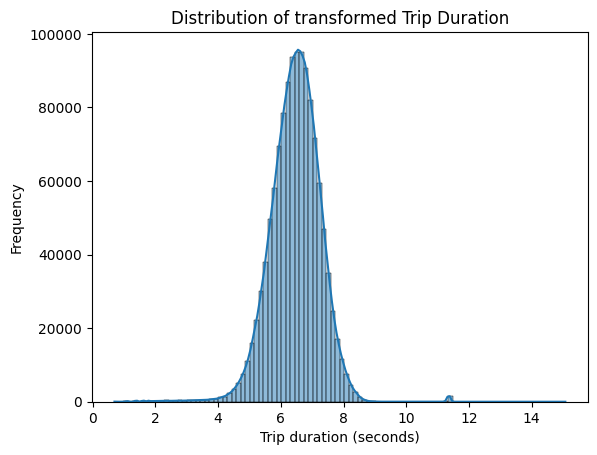

In [ ]:
df["trip_duration_transformed"] = np.log1p(df["trip_duration"])
sns.histplot(df["trip_duration_transformed"], bins=100, kde=True)
plt.title('Distribution of transformed Trip Duration')
plt.xlabel('Trip duration (seconds)')
plt.ylabel('Frequency')
plt.show()

### Effect of Log Transformation
- The distribution is now much more symmetric
- Long tail of extreme trips is compressed
- Still some outliers, but their effect is reduced
- This transformed feature (`trip_duration_transformed`) will likely be used for modeling instead of the raw target


<Axes: ylabel='trip_duration_transformed'>

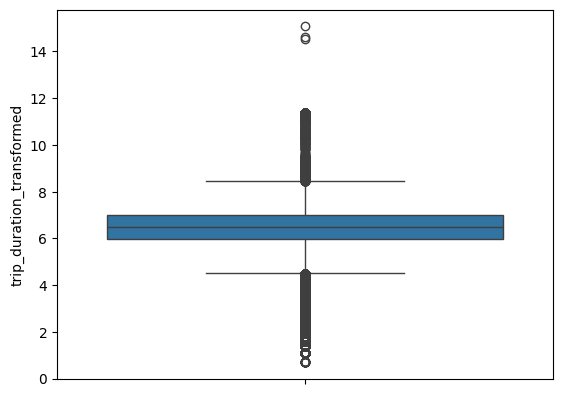

In [ ]:
sns.boxplot(df["trip_duration_transformed"])

### Observations from target analysis
- Many extreme values exist in `trip_duration` (e.g., 1 second, 3e6 seconds) → likely unrealistic trips
- Distribution is extremely skewed, so we applied log transform
- Outliers are still present but much less extreme after log transform
- Transformed target may be more suitable for modeling

# **4. Feature Exploration**

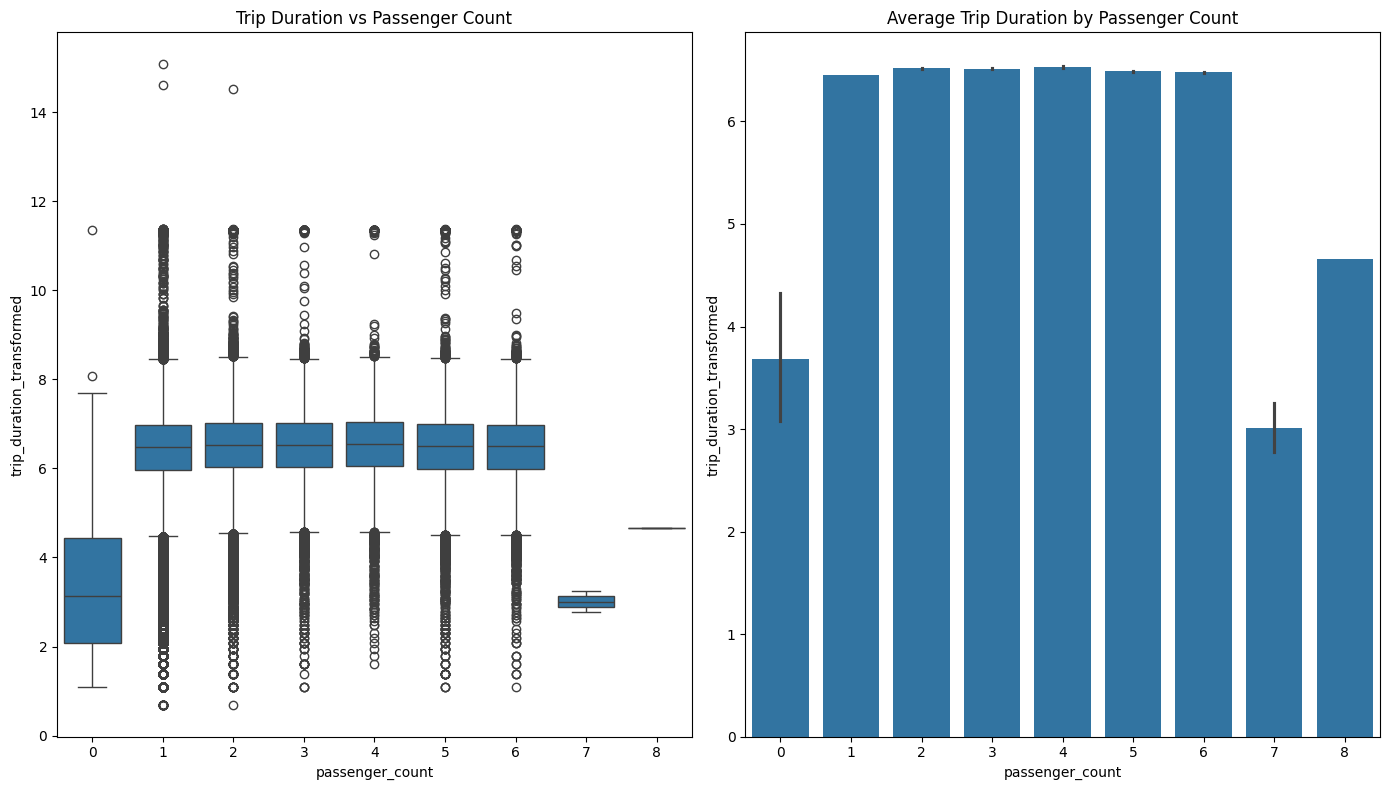

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 8))

# Countplot (frequency of passenger counts)
sns.boxplot(x="passenger_count", y="trip_duration_transformed", data=df , ax=axes[0])
axes[0].set_title("Trip Duration vs Passenger Count")

# Barplot (average trip duration by passenger count)
sns.barplot(x="passenger_count", y="trip_duration_transformed", data=df, ax=axes[1])
axes[1].set_title("Average Trip Duration by Passenger Count")

plt.tight_layout()
plt.show()

## **Passenger Count**
- The boxplot shows several outliers, represented by points beyond the whiskers.  
- Average trip durations for passenger counts between **1 and 6** are fairly similar, indicating passenger number does not strongly influence trip duration.  
- Trips with **0 passengers** are clearly invalid and treated as outliers.  
- Trips with **7 or 8 passengers** are unusually short compared to the rest, suggesting either data entry errors or rare special cases.  

1.   List item
2.   List item




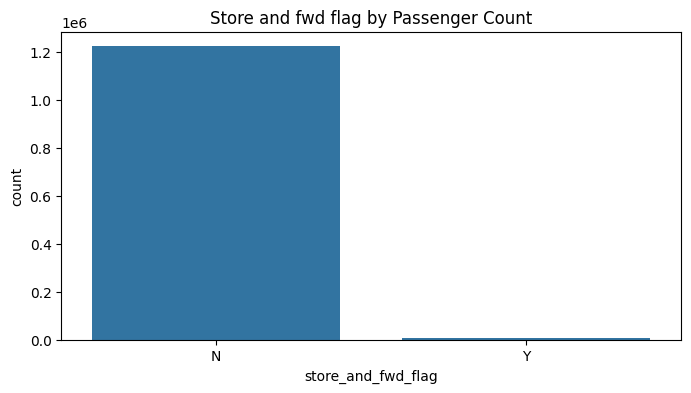

In [ ]:
# boxplot (Vendor ID vs Transformed trip duration)
plt.figure(figsize=(8, 4))
fig = sns.countplot(x="store_and_fwd_flag", data=df )
plt.title("Store and fwd flag by Passenger Count")
plt.show()

## **Store-and-Forward Flag**
- The distribution is highly imbalanced: majority of trips are sent in real-time (`N`), while only a very small fraction are stored and forwarded (`Y`).
- Due to this imbalance, boxplots/barplots are not very informative because the small sample size of `Y` makes comparisons unreliable.
- Conclusion: The feature likely has minimal impact on trip duration but may still be included as a categorical variable for completeness.


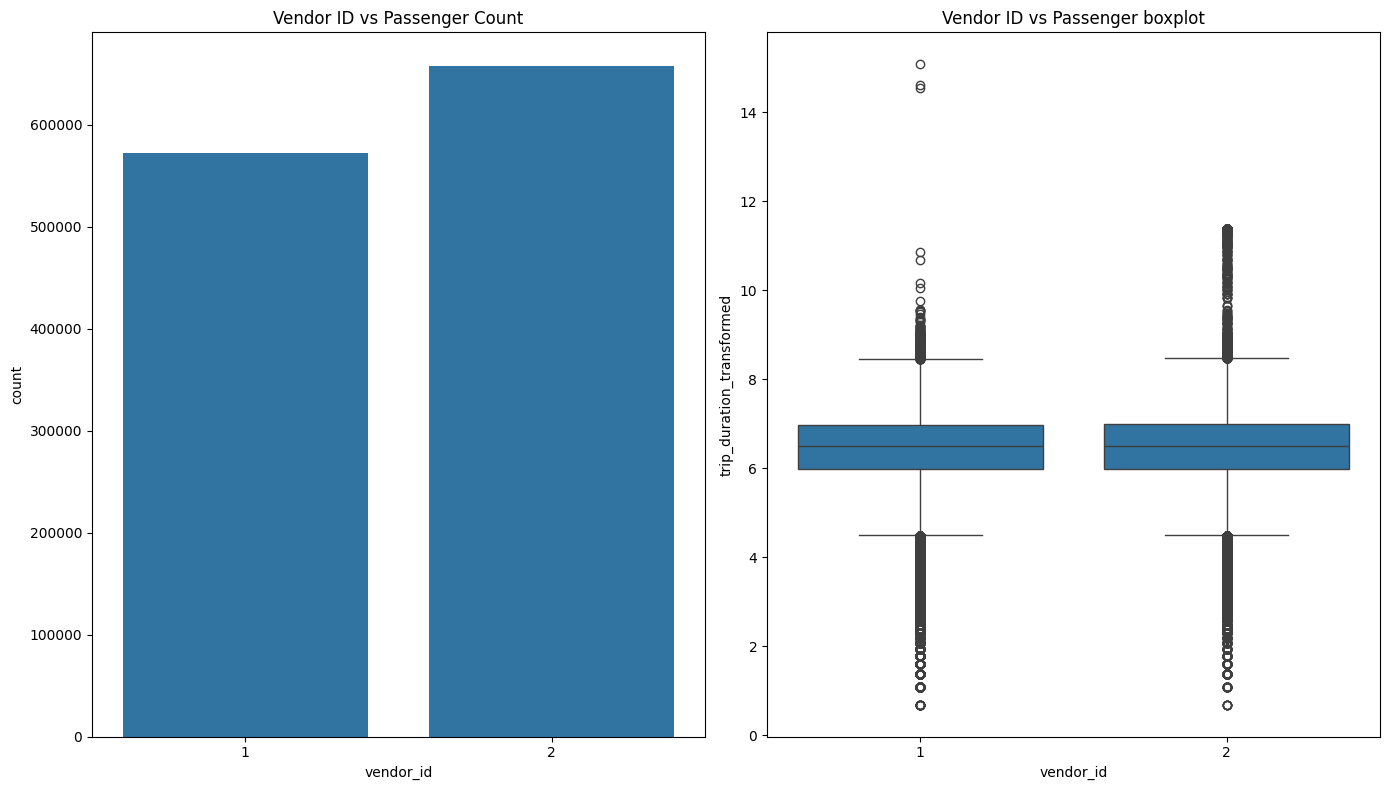

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 8))
# Countplot (frequency of passenger counts)
sns.countplot(x="vendor_id", data=df , ax=axes[0])
axes[0].set_title("Vendor ID vs Passenger Count")

# Barplot (average trip duration by passenger count)
sns.boxplot(x="vendor_id",y="trip_duration_transformed",  data=df, ax=axes[1])
axes[1].set_title("Vendor ID vs Passenger boxplot")

plt.tight_layout()
plt.show()

## **Vendor ID**
- Two vendors are present in the dataset, and their distribution is almost balanced.
- Boxplot shows that both vendors have similar trip duration patterns (comparable medians and spread).
- Outliers exist in both vendors, but no clear vendor-specific trend in duration is observed (we'll revisit outliers later).
- Conclusion: Vendor ID likely has limited predictive power for trip duration.

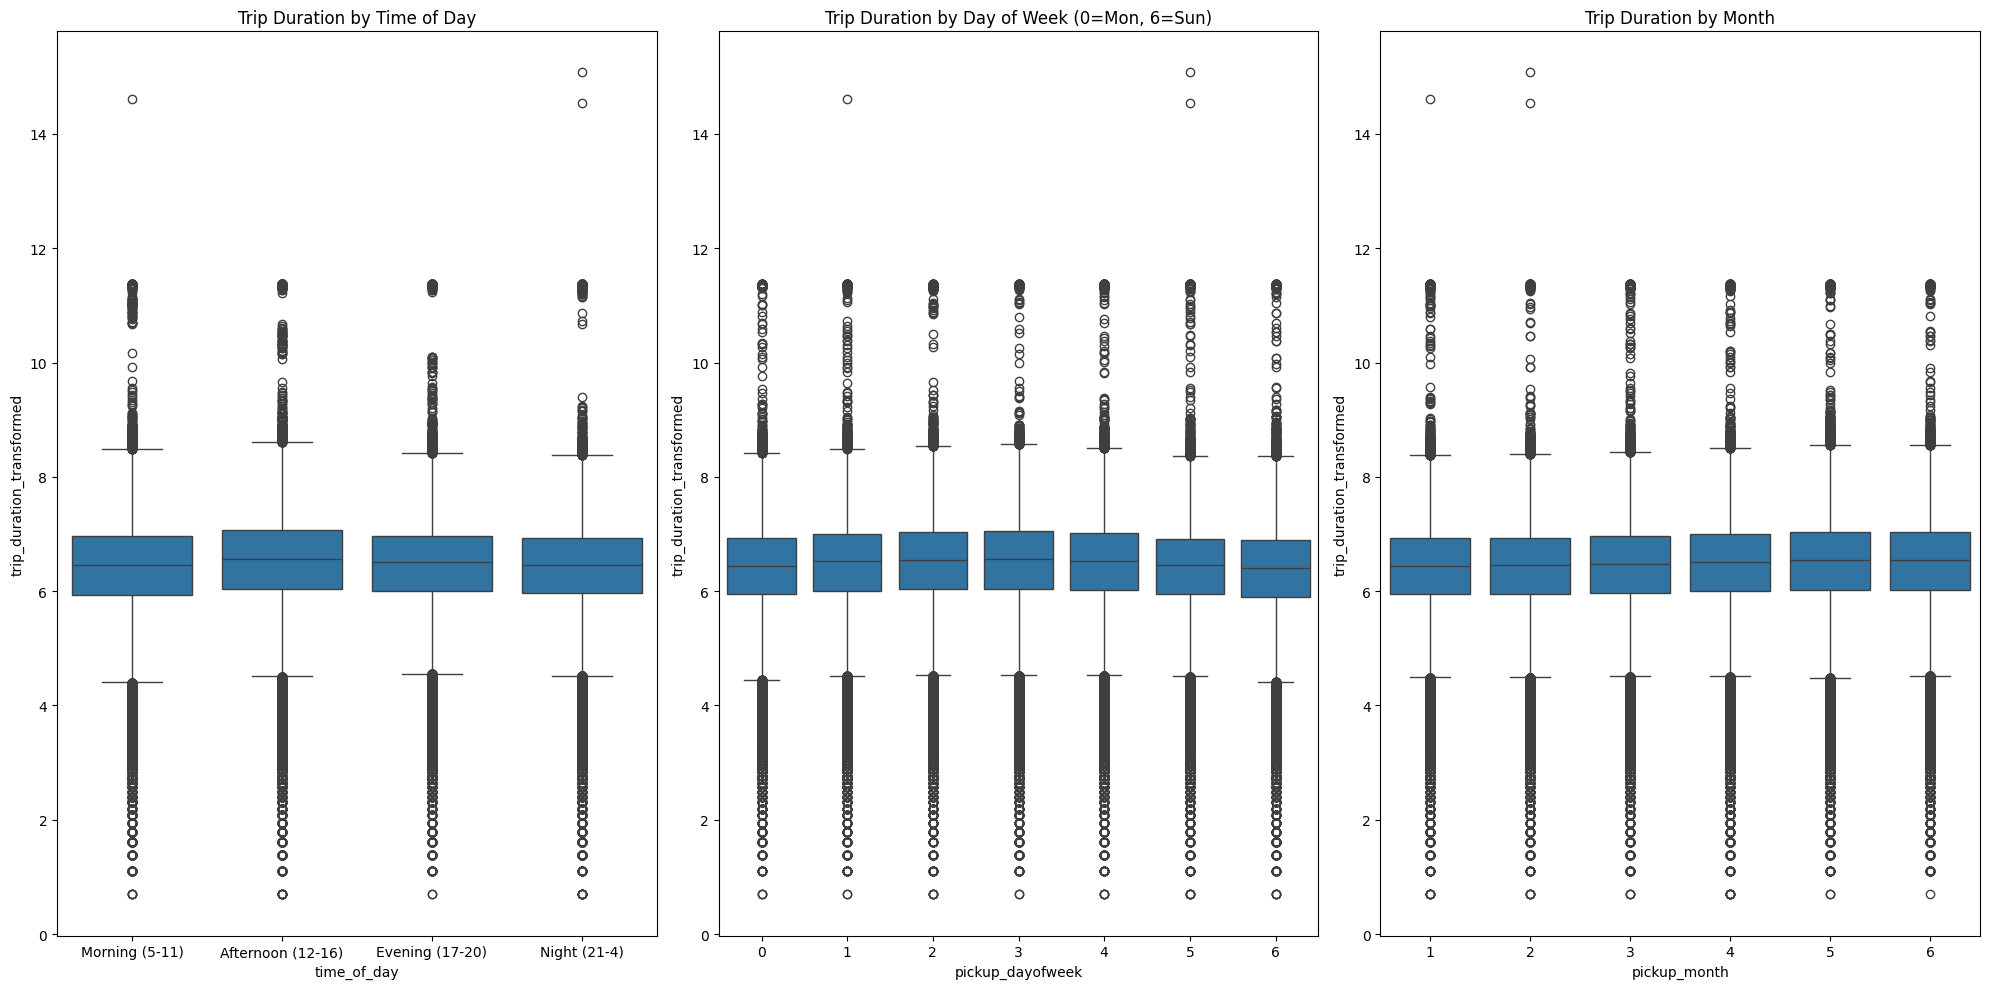

In [ ]:
# Convert pickup_datetime if not already done
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Extract features
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_dayofweek'] = df['pickup_datetime'].dt.dayofweek  # 0=Monday
df['pickup_month'] = df['pickup_datetime'].dt.month

# Bin hours into categories
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return "Morning (5-11)"
    elif 12 <= hour < 17:
        return "Afternoon (12-16)"
    elif 17 <= hour < 21:
        return "Evening (17-20)"
    else:
        return "Night (21-4)"

df['time_of_day'] = df['pickup_hour'].apply(get_time_of_day)

# Subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

# Plot 1: Time of day
sns.boxplot(x="time_of_day", y="trip_duration_transformed", data=df, ax=axes[0],
            order=["Morning (5-11)", "Afternoon (12-16)", "Evening (17-20)", "Night (21-4)"])
axes[0].set_title("Trip Duration by Time of Day")

# Plot 2: Day of week
sns.boxplot(x="pickup_dayofweek", y="trip_duration_transformed", data=df, ax=axes[1])
axes[1].set_title("Trip Duration by Day of Week (0=Mon, 6=Sun)")

# Plot 3: Month
sns.boxplot(x="pickup_month", y="trip_duration_transformed", data=df, ax=axes[2])
axes[2].set_title("Trip Duration by Month")

plt.tight_layout()
plt.show()


## **Pickup Datetime Analysis**

### Time of Day
- Afternoon trips (12–16) show the highest median trip durations compared to other times of day.  
- Night trips (21–4) tend to be shorter and more consistent, possibly due to lighter traffic.  

### Day of Week
- Wednesday, Thursday, and Friday have noticeably higher trip durations compared to the start of the week.  
- Weekends (Saturday and Sunday) generally show slightly lower trip durations, likely reflecting reduced commuter traffic.  

### Month
- April, May, and June show higher trip durations, suggesting seasonal effects (e.g., increased travel or tourism).  
- Early months (January–March) have shorter trips on average, which could be influenced by colder weather reducing activity.  

---


In [ ]:
# Haversine distance
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    return R * c  # distance in km

df["haversine_distance"] = df.apply(
    lambda row: haversine(row["pickup_latitude"], row["pickup_longitude"],
                          row["dropoff_latitude"], row["dropoff_longitude"]), axis=1
)

#Manhattan distance
def manhattan_distance(lat1, lon1, lat2, lon2):
    lat_km = 111  # 1 deg latitude ≈ 111 km
    lon_km = 111 * np.cos(np.radians((lat1 + lat2)/2))  # average latitude for longitude scaling
    return abs(lat2 - lat1) * lat_km + abs(lon2 - lon1) * lon_km

df["manhattan_distance"] = df.apply(
    lambda row: manhattan_distance(
        row["pickup_latitude"], row["pickup_longitude"],
        row["dropoff_latitude"], row["dropoff_longitude"]
    ), axis=1
)


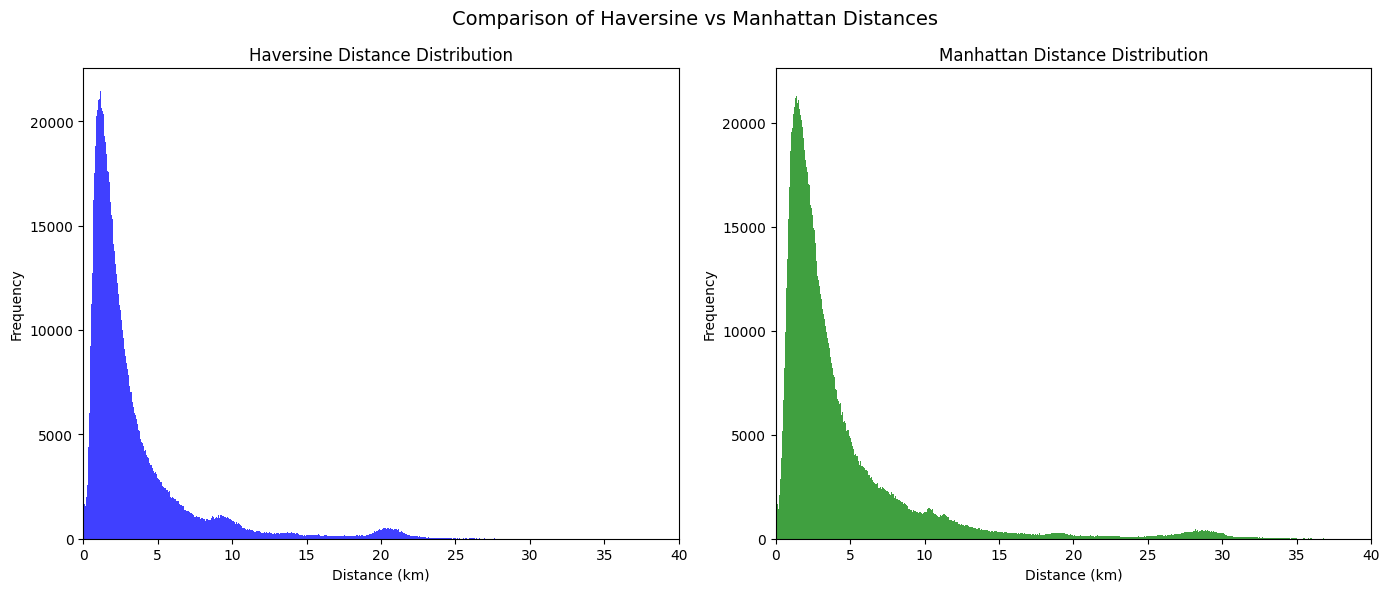

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Haversine distance
sns.histplot(df["haversine_distance"], ax=axes[0], color='blue')
axes[0].set_xlim(0, 40)
axes[0].set_title("Haversine Distance Distribution")
axes[0].set_xlabel("Distance (km)")
axes[0].set_ylabel("Frequency")

# Manhattan distance
sns.histplot(df["manhattan_distance"], ax=axes[1], color='green')
axes[1].set_xlim(0, 40)
axes[1].set_title("Manhattan Distance Distribution")
axes[1].set_xlabel("Distance (km)")
axes[1].set_ylabel("Frequency")

plt.suptitle("Comparison of Haversine vs Manhattan Distances", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
df[["haversine_distance" , "trip_duration_transformed" , "manhattan_distance"]].corr()

,haversine_distance,trip_duration_transformed,manhattan_distance
haversine_distance,1.000000,0.565312,0.993566
trip_duration_transformed,0.565312,1.000000,0.557063
manhattan_distance,0.993566,0.557063,1.000000


## **Geospatial Features: Haversine vs Manhattan Distances**
- **Haversine distance**: straight-line distance between pickup and dropoff points.
- **Manhattan distance**: approximates real road/grid travel distance using latitude/longitude.
- Most trips are short (<10 km), but the Manhattan distance is slightly higher on average due to grid-based travel.
- Both distributions are heavily right-skewed; extreme outliers exist (>40 km) and are cropped in plots.
- Both features will be used as predictors in the modeling phase due to their good correlation with the target


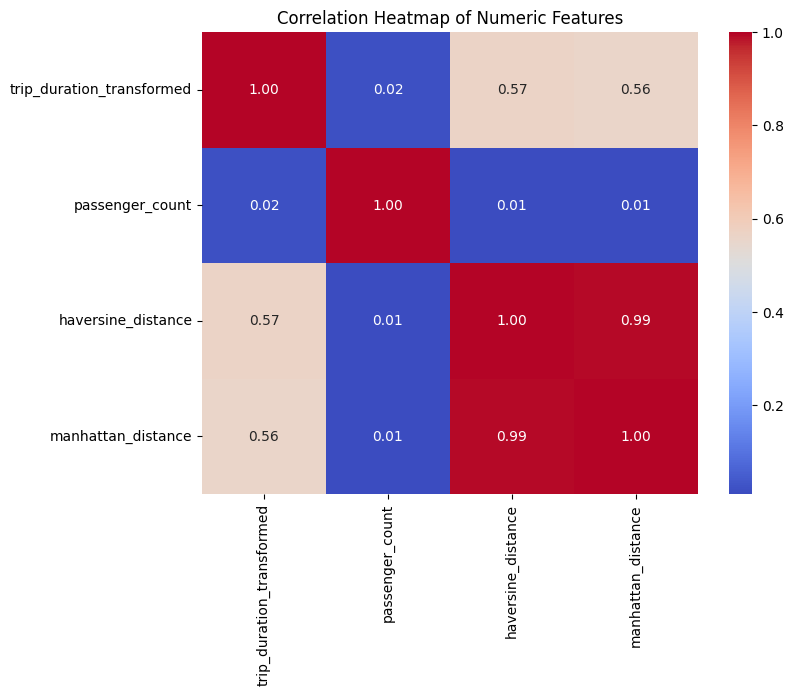

In [ ]:
numeric_features = ["trip_duration_transformed", "passenger_count",
                    "haversine_distance", "manhattan_distance"]

plt.figure(figsize=(8, 6))
corr = df[numeric_features].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


- `trip_duration_transformed` shows **moderate correlation (~0.5) with distance features** which is good for modeling.
- `passenger_count` has a weak correlation, confirming it’s less predictive alone.
- Haversine and Manhattan distances are very strongly correlated (~0.95) — both capture similar information.
